**We focus on**:
R² Score
Residual Analysis
Cross-Validation
Underfitting vs Overfitting
Practical evaluation workflow
Understanding this is more important than adding features or models.
A model is useless if you don't know how to evaluate it.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

### Creating a simple dataset for learning

In [2]:
np.random.seed(42)

X = 2 * np.random.rand(200, 1)
y = 4 + 3 * X + np.random.randn(200, 1)

*Explanation*:

X = random values between 0 and 2

y = 4 + 3x + noise → a simple linear pattern

np.random.randn adds noise (like real data)

### Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


*Model learns the best line that fits the data.*

### Make predictions

In [6]:
y_pred = model.predict(X_test)

## R² SCORE (Most important)

**What is R²?** 

R² tells you how much of the variation in y your model can explain.

R² = 1 → perfect

R² = 0 → model is useless

R² < 0 → worse than predicting average

In [7]:
#calculating R2

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

#this tells us the model quality

R2 Score: 0.676253633847987


## RESIDUALS

**What are residuals?**

Residual = Actual value − Predicted value

They show how wrong the model was.

In [8]:
#Calculate residuals
residuals = y_test - y_pred

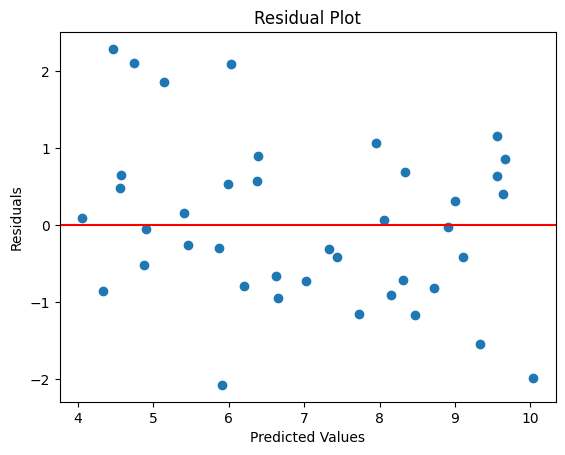

In [9]:
#Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**How to interpret:**

Good model:

         Residuals look random
 
         Spread equally above and below 0

Bad model:

         Curve shape → linear model too simple
 
         Residuals grow with size → model unstable
   
         Pattern → model missing features

## CROSS-VALIDATION (More reliable score)

**Why do we use cross-validation?**

Sometimes your model looks good on the test set by luck.

Cross-validation splits the data into different chunks and trains multiple times.

In [10]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("CV Scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())

CV Scores: [0.78890481 0.69568329 0.6714304  0.83539393 0.82072452]
Average CV R2: 0.762427390640539


In [11]:
#Simple meaning:If CV scores are stable → model is reliable
#If they jump a lot → model is unstable

## UNDERFITTING vs OVERFITTING

**Underfitting**:

Model is too simple.

Symptoms:

    Low training score

    Low test score

    Example: fitting straight line to curved data

Fix:

    Add features

    Use polynomial regression

    Reduce regularization

**Overfitting**:

Model memorizes training data.

Symptoms:

    High training score

    Low test score (bad generalization)

    Happens in high-degree polynomial models

Fix:

    Use regularization (Ridge/Lasso)

    Use simpler model

    Reduce noise

    More training data

### Extra metrics good to know

In [12]:
#MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 0.8387402733729704
MSE: 1.084623862545469
RMSE: 1.041452765393356
